<a href="https://colab.research.google.com/github/amitreddy/rutgers-datamining/blob/main/homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To open in colab: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/gist/bellecp/3d726ac25505a076ab4c39b85db50c80/Homework2.ipynb)

In [1]:
# netid: akr99
# name: Amit Reddy

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (21,12)
plt.rcParams["lines.linewidth"] = 4
plt.rcParams["font.size"] = 24
plt.rcParams['lines.markersize'] = 10

# Problem 1: covariance matrix
Consider a data matrix $X$ of size $n\times 2$, with $n$ observations $(x_i)_{i=1,2,...,n}$, each observation $x_i \in R^2$.
Compute the covariance matrix $$\frac 1 n \sum_{i=1}^n (x_i - \bar x)(x_i - \bar x)^T$$ (this is a matrix of size $2\times 2$),
where $\bar x$ is the vector in $R^2$ containing the average of the first column of $X$ as the first component and the average of the last column of $X$ as the second component.

We will take $n = 465$ and generate a normally distributed observations. Compute $\bar x \in R^2$ in a variable ``X_bar`` of shape ``(2, )`` and the covariance matrix in a variable ``covariance`` of shape ``(2, 2)`` using broadcasting or otherwise.
You can verify your result by making sure that your computed covariance matrix is the same as ``np.cov(X, rowvar=False, bias=True)``.

(465, 2)

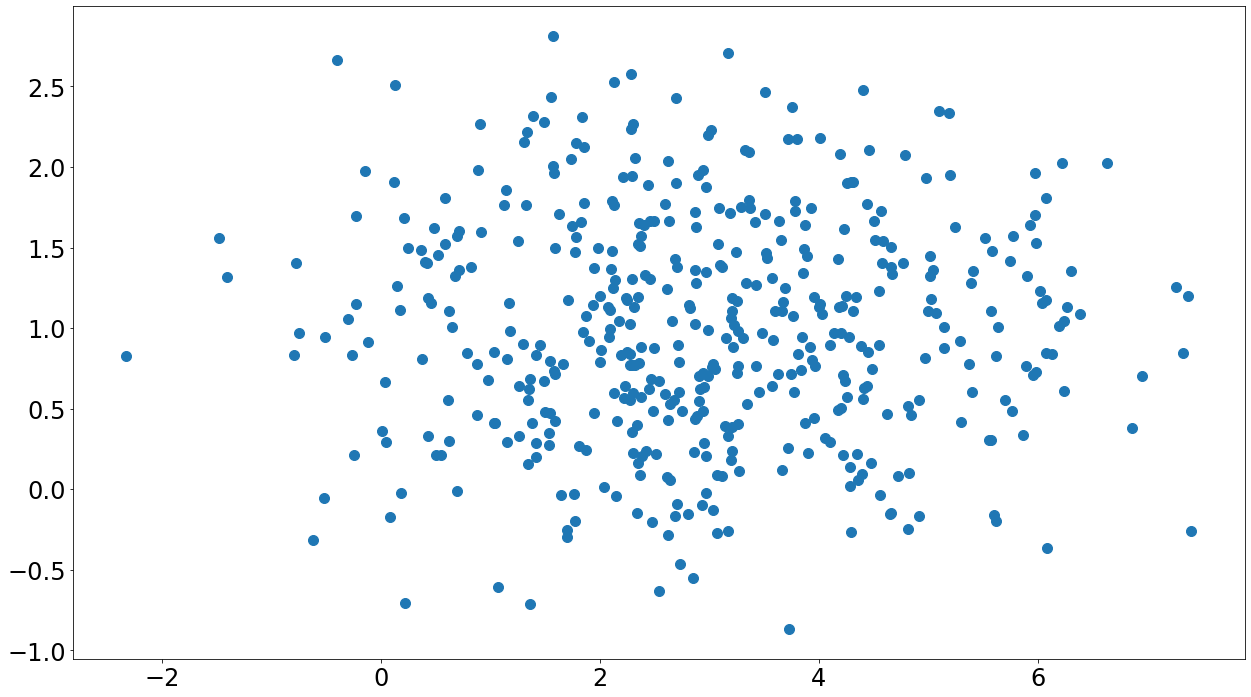

In [3]:
n = 465
X = np.random.multivariate_normal([3., 1.], [[2., 1.], [1., 2.5]], size=(n, ))
X = np.random.multivariate_normal([3., 1.], [[3., 0.], [0., 0.5]], size=(n, ))
plt.scatter(X[:, 0], X[:, 1])
X.shape

In [23]:
X_bar = np.mean(X, axis=0)
X_bar

array([2.96093903, 0.9963975 ])

In [33]:
Y = X - X_bar
cov = (Y.T @ Y)/n
cov

array([[ 2.95850508e+00, -2.50285032e-03],
       [-2.50285032e-03,  4.90164251e-01]])

In [26]:
built_in_covariance_for_verification = np.cov(X, rowvar=False, bias=True)
built_in_covariance_for_verification

array([[ 2.95850508e+00, -2.50285032e-03],
       [-2.50285032e-03,  4.90164251e-01]])

# Problem 2a
For the following data set of size 303, create a training set (variables ``x_train`` and ``y_train`` of size 202 and a test set of size 101 (variables ``x_test, y_test``). Use a random permutation to shuffle the data before

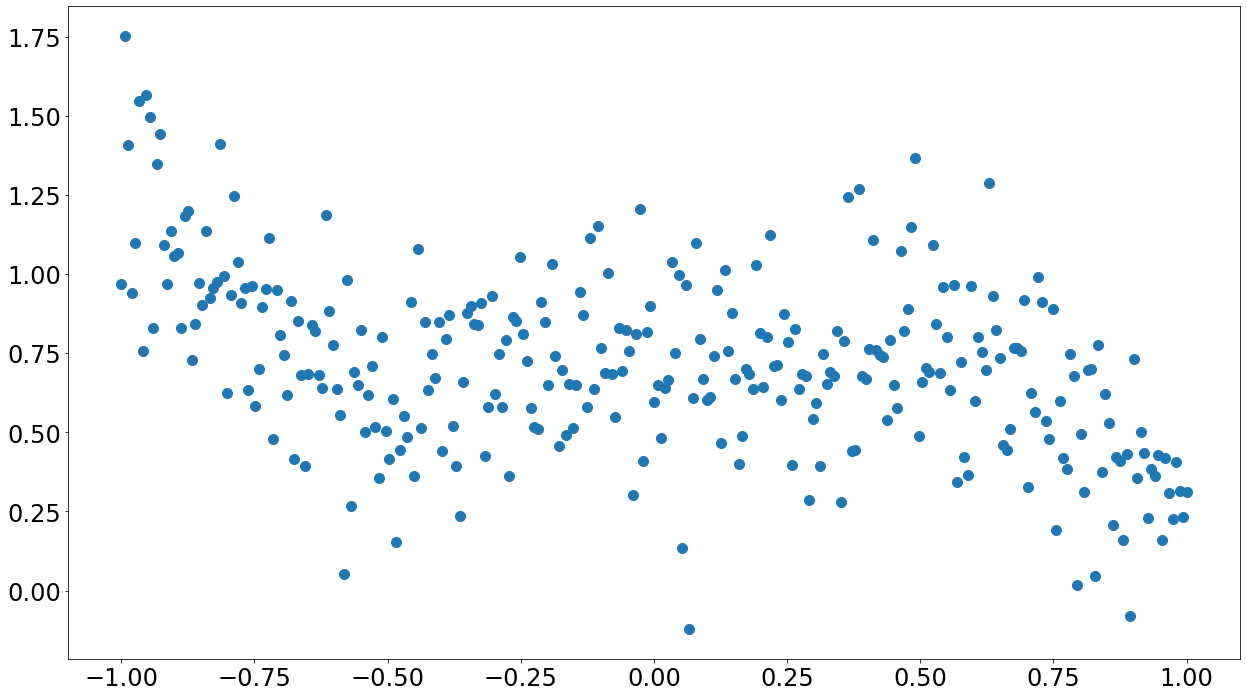

In [36]:
N = 303
x = np.linspace(-1, 1, num=N)
y = np.log(1+np.exp(x**2 * np.sin(5*x))) + 0.22 * np.random.normal(size=(N, ))
plt.scatter(x, y)

In [38]:
indices = np.random.permutation(N)
indices

array([298, 123, 173, 153,  87, 133, 206, 243, 271, 288, 247, 143, 239,
       259, 149,  78, 101, 300, 263,  35,  53,  61,  36, 220,  63, 178,
       120, 215, 228, 125, 261,  25,  55, 207, 255, 161, 148, 278,  58,
       264, 201, 136, 119, 185, 162, 132, 165, 276, 242, 103, 252,  22,
       160,  23, 113, 258, 249,  75,  47,   4, 150, 106, 273, 238,   1,
       197, 158, 285, 112, 169, 167, 234,  82, 176, 118, 301, 109,  20,
       294, 297,  10, 296,  69,  38, 282, 217, 289, 218, 166, 200, 116,
         7,  54, 159,  28,  96, 137, 182,  77,  81, 277,  90, 244,  59,
        13, 245, 213, 204,  48, 121, 233, 196, 193, 115, 212,  30, 227,
        39, 183, 210,  89, 235,  29,   9, 100, 105, 262, 140,   8,  17,
       270, 184,  16, 131,  18, 299, 107,  19, 142, 248, 268, 124, 251,
       138,  95, 191, 180, 194, 186,   6, 157, 156, 111,  91, 216, 151,
        62, 286, 203, 199,  34,  57, 281, 226, 177, 154, 275, 241,  44,
        50,  98, 211, 236,  83, 172, 155,  92,  70,  60,  73, 22

In [39]:
n_sample_training_set = 202
x_permuted = x[indices]
y_permuted = y[indices]

x_train = x_permuted[:n_sample_training_set]
y_train = y_permuted[:n_sample_training_set]

x_test = x_permuted[n_sample_training_set:]
y_test = y_permuted[n_sample_training_set:]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((202,), (202,), (101,), (101,))

# Problem 2b
Plot the training and test set on the same figure with two different colors. For instance you may use two ``plt.scatter(...)``.

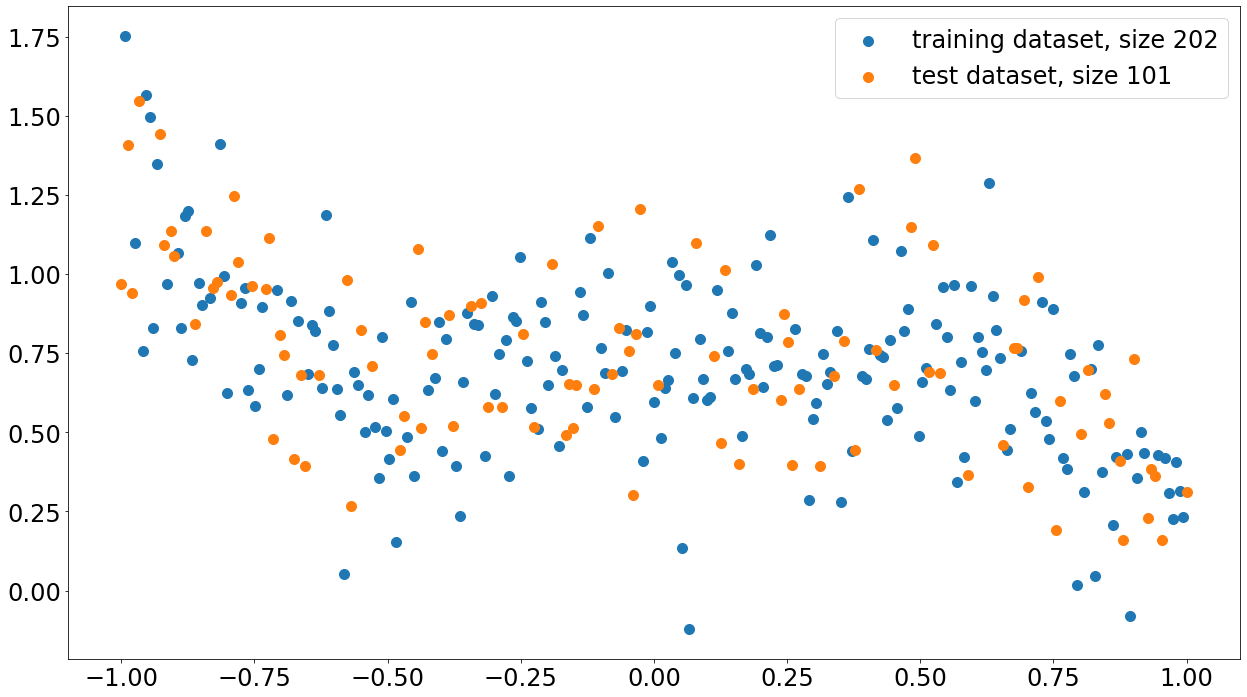

In [41]:
plt.scatter(x_train, y_train, label='training dataset, size %s' % n_sample_training_set)
plt.scatter(x_test, y_test, label='test dataset, size %s' % (N-n_sample_training_set))
plt.legend()

# Problem 2c: Local linear regression and broadcasting
As in the lecture, we will perform a local linear regression
with the Gaussian kernel.

In [42]:
def D(t):
    return np.exp(-t**2/2)

The requirement is to compute the local linear regression estimate prediction, simultaneously on each $x_{new}$ of the test set,
using all the $(x_i,y_i)$ from training set, simultaneously for 7 different bandwidth parameters. You must compute the following quantities with the given shapes:
- The kernel weights $K_h(x_i, x_{new})$ in a variable ``W`` with shape (7, 101, 1, 202).
- The matrix $B$ in a variable ``B`` of shape (1, 1, 202, 2)
- The transpose of matrix $B$ in a variable ``B_T`` of shape (1, 1, 2, 202)
- The intercepts for each bandwidth and each $x_{new}$ from the test set in a variable ``intercepts`` of shape (7, 101)
- The slopes for each bandwidth and each $x_{new}$ from the test set in a variable ``slopes`` of shape (7, 101)
- The predictions $y_{new}=\alpha(x_{new}) + x_{new}\beta(x_{new})$ for each bandwidth and each $x_{new}$ in the test set, in a variable ``y_test_predictions`` of shape (7, 101)
- The test errors, one for each bandwidth, in a variable ``test_errors`` of shape (7, )
Feel free to check out the code used in lecture 2.
Hint: the linear algebra operations such as ``@`` (matrix product) and ``np.linalg.inv(...)`` (matrix inverse) apply to the last two axes.
Hint2: you may use ``a.reshape(...)`` and ``np.swapaxes(a, ...)`` to reshape a multidimensional array ``a``. 

In [ ]:
n_bandwidth = 7
h = np.array([1.0, 0.5, 0.2, 0.1, 0.08, 0.05, 0.01]).reshape((n_bandwidth, 1, 1, 1))
n_test = len(x_test)
n_train = len(x_train)
#
# your code goes here.
# Create several code cells to easily debug the shape of all your intermediary variables.
#

NameError: name 'x_test' is not defined

The next code cell will display the test errors (one for each banwdidth) and the predictions after you have solved question 2c in previous code cells. The next code should display something similar to <https://pierre.bellec.eu/teaching/2022-Spring-588/hw2_desired_output.png> (although this images has 5 bandwidths, while you should have 7).

NameError: name 'test_errors' is not defined

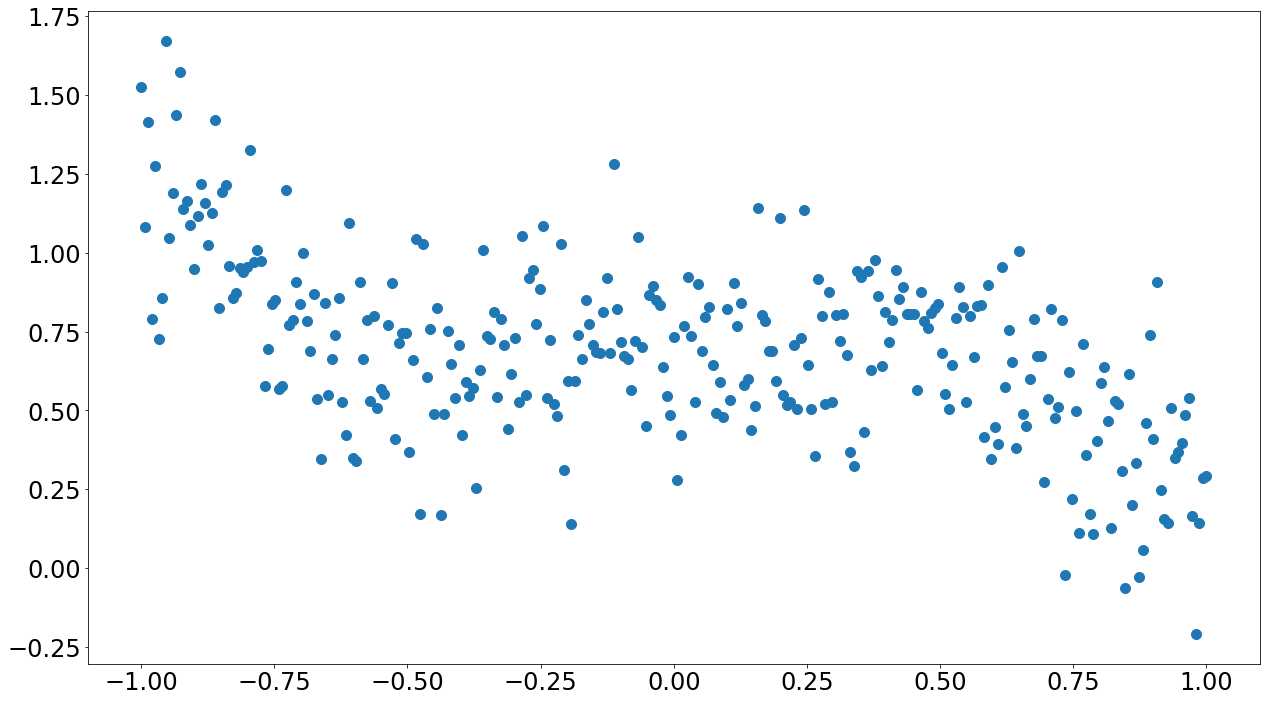

In [ ]:
plt.scatter(x, y)
for i in range(n_bandwidth):
    print('For bandwith h=', h[i, 0, 0, 0], ' the test error is', test_errors[i])
    # plt.scatter(x_test, y_test, label="test set")
    sorted_indices = np.argsort(x_test)
    plt.plot(x_test[sorted_indices], y_test_predictions[i, sorted_indices], label="predictions for h=%s" % h[i, 0, 0, 0])
    plt.legend()